In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
case = pd.read_csv('../data/covid/Case.csv')
# 데이터 파일 불러오기
case

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
...,...,...,...,...,...,...,...,...
169,6100012,Gyeongsangnam-do,-,False,etc,20,-,-
170,7000001,Jeju-do,-,False,overseas inflow,14,-,-
171,7000002,Jeju-do,-,False,contact with patient,0,-,-
172,7000003,Jeju-do,-,False,etc,4,-,-


In [107]:
case = case.drop(["latitude", "longitude"], axis=1)
case

,case_id,province,city,group,infection_case,confirmed
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139
1,1000002,Seoul,Gwanak-gu,True,Richway,119
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43
...,...,...,...,...,...,...
169,6100012,Gyeongsangnam-do,-,False,etc,20
170,7000001,Jeju-do,-,False,overseas inflow,14
171,7000002,Jeju-do,-,False,contact with patient,0
172,7000003,Jeju-do,-,False,etc,4


In [108]:
titles = case['infection_case'].unique()
titles

array(['Itaewon Clubs', 'Richway', 'Guro-gu Call Center',
       'Yangcheon Table Tennis Club', 'Day Care Center',
       'Manmin Central Church', 'SMR Newly Planted Churches Group',
       'Dongan Church', 'Coupang Logistics Center', 'Wangsung Church',
       "Eunpyeong St. Mary's Hospital", 'Seongdong-gu APT',
       'Jongno Community Center', 'Samsung Medical Center',
       'Jung-gu Fashion Company', 'Yeonana News Class',
       'Korea Campus Crusade of Christ', 'Gangnam Yeoksam-dong gathering',
       'Daejeon door-to-door sales',
       'Geumcheon-gu rice milling machine manufacture',
       'Shincheonji Church', 'Guri Collective Infection',
       'KB Life Insurance', 'Yeongdeungpo Learning Institute',
       'Gangnam Dongin Church', 'Biblical Language study meeting',
       'Seocho Family', 'Anyang Gunpo Pastors Group',
       'Samsung Fire & Marine Insurance', 'SJ Investment Call Center',
       'Yongin Brothers', 'Seoul City Hall Station safety worker',
       'Uiwang Logisti

In [119]:
pd.crosstab(case['infection_case'], len(case['province']))

col_0,174
infection_case,
Anyang Gunpo Pastors Group,2
Biblical Language study meeting,1
Bonghwa Pureun Nursing Home,1
Bundang Jesaeng Hospital,1
Changnyeong Coin Karaoke,1
...,...
contact with patient,16
etc,17
gym facility in Cheonan,1


In [115]:
case['cumsum'] = (case['infection_case']*case['confirmed']).groupby(case[' case_id']).cumsum()

DataError: No numeric types to aggregate

In [96]:
inf = pd.crosstab(case['infection_case'],
                 )
inf

AttributeError: 'list' object has no attribute 'sum'

In [103]:
case['infection_case'].value_counts()
case

,province,city,group,infection_case,confirmed,loc
0,Seoul,Yongsan-gu,True,Itaewon Clubs,139,NaN
1,Seoul,Gwanak-gu,True,Richway,119,NaN
2,Seoul,Guro-gu,True,Guro-gu Call Center,95,NaN
3,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,NaN
4,Seoul,Dobong-gu,True,Day Care Center,43,NaN
...,...,...,...,...,...,...
169,Gyeongsangnam-do,-,False,etc,20,NaN
170,Jeju-do,-,False,overseas inflow,14,NaN
171,Jeju-do,-,False,contact with patient,0,NaN
172,Jeju-do,-,False,etc,4,NaN


/Users/joy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='infection_case', ylabel='count'>

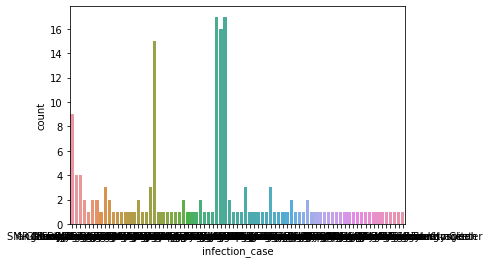

In [63]:
sns.countplot('infection_case', data = case)

<AxesSubplot:>

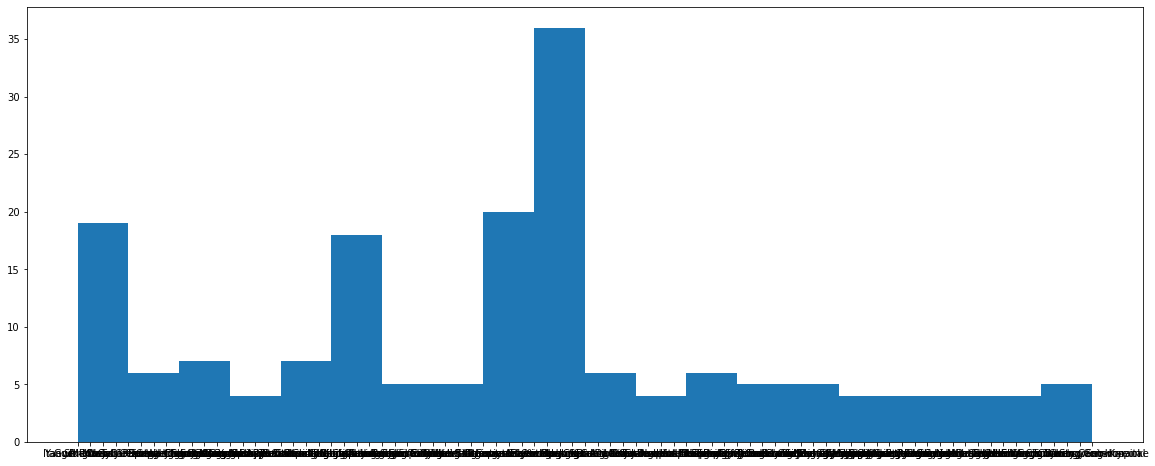

In [68]:
case['infection_case'].hist(bins=20, figsize=(20,8), grid=False)

/Users/joy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='infection_case', ylabel='count'>

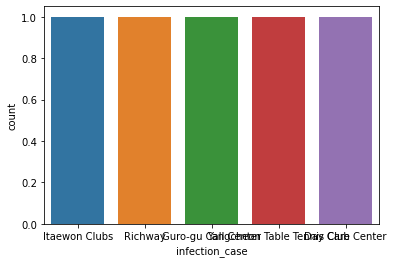

In [69]:
sns.countplot('infection_case', data=case.head())